# **Optimizing Marketing Campaigns for Enhanced ROI: A Data-Driven Approach**



# **Executive Summary**

**Purpose:** This project analyzes **marketing campaign data** for **"NovaTerra"** to identify **key drivers of success** and proposes **data-driven solutions** to **improve campaign performance**, ultimately optimizing marketing strategies and **maximizing ROI**.

**Methodology:** Leveraging a dataset of customer demographics, purchasing behavior, and campaign responses, the analysis involved data cleaning, exploratory data analysis, customer segmentation using RFM analysis, and predictive modeling with a Random Forest Classifier. Channel performance and product recommendations were also investigated.

**Key Findings:**

  * High-value and loyal customer segments demonstrate the strongest response rates to marketing campaigns.
  
  * Store and web channels prove most effective in reaching and engaging these valuable segments.

  * Campaigns Cmp3 and Cmp5 demonstrate significant success in driving customer response.


**Recommendations:**

* Personalize marketing campaigns to target high-value and loyal customer segments.

* Prioritize marketing efforts on store and web channels.

* Continue to leverage successful campaign strategies from Cmp3 and Cmp5.

* Implement product recommendation strategies based on frequent itemsets.

This analysis provides actionable insights to guide marketing investments and drive growth. By optimizing strategies to acquire and retain valuable customers, the business can significantly boost profitability.



## **Introduction**

* In today's competitive market, businesses constantly seek ways to optimize their marketing efforts and maximize return on investment (ROI).

* This project delves into the effectiveness of marketing campaigns by leveraging data analysis to identify key drivers of success and propose data-driven solutions for improvement.


## **i. Problem Statement**

* Our client is facing challenges in achieving the desired results from their current marketing campaigns, leading to potentially **lower conversion rates** and **reduced ROI**.

* This project aims to address this **problem** by conducting a comprehensive data analysis to identify the underlying factors contributing to **campaign ineffectiveness** and **propose data-driven solutions** for improvement.


## **ii. Business Context**

* In today's competitive market, effective marketing campaigns are crucial for business growth and profitability.

* **Poorly performing campaigns can lead to significant financial losses and missed opportunities for customer acquisition.**

* This project emphasizes data-driven decision-making as a key strategy for **optimizing marketing investments** and ensuring alignment with business objectives.



## **iii. Project Objective**

* The objective of this project is to leverage data analytics to **identify key drivers of campaign effectiveness**, uncover areas for improvement, and **propose data-driven strategies to optimize future marketing efforts**.

* This includes **analyzing customer segmentation, channel performance, product preferences, and campaign response patterns to deliver actionable recommendations for maximizing ROI**.

* The outcomes of this project will be presented in a comprehensive report to the Senior Marketing Manager.


## **iv. Methodology**

* This project will involve data cleaning, exploratory data analysis, customer segmentation, predictive modeling, evaluation of campaign performance metrics and Key findings and recommendations.

## **Data Analysis Plan**

1. **Data Cleaning:** correct data types, Handle missing values and remove duplicates.

2.  **Exploratory Data Analysis (EDA):** Understand the data distribution, identify patterns, and visualize key insights.

3.  **Feature Engineering:** Create new features that might help improve the model's performance.

4.  **Model Building:** Build and evaluate different models to find the best one for predicting campaign effectiveness.

5. **Proposed Solutions:** Based on the analysis, propose data-driven solutions to improve marketing campaign effectiveness.



### Importing Libraries

In [ ]:
# Import necessary libraries for the analysis

# Working with arrays
import numpy as np

# Data analysis
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
!pip install plotly --upgrade
import plotly.express as px

# To avoid warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='_plotly_utils')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 71.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


### Loading the Dataset

In [ ]:
#dataset available in Github repo.
df = pd.read_csv("https://raw.githubusercontent.com/Qamar247/Marketing-Campaign-Effectiveness-Analysis/refs/heads/main/marketing_data_analytics.csv")


# Displaying rows of the dataset
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


## **1. Data Cleaning**

* Find and replace missinng values. One of the most important step in building EDA pipelines.

* e.g. The main task/goal of data scientisit is Data cleaning. If there are some missing values and we train our model it will not give us accurate results.

In [ ]:
#checking data types of columns always before data cleaning.
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,object
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [ ]:
# To ensure that the "Income" column is treated as a string, we need to explicitly convert it to a string type before performing string operations.

# Renamed column to remove leading/trailing spaces
df.rename(columns={' Income ': 'Income'}, inplace=True)

# Ensured all values in 'Income' column are strings
df['Income'] = df['Income'].astype(str)

# Removed the dollar sign and commas, then convert to float
df['Income'] = df['Income'].str.replace("$", "")
df['Income'] = df['Income'].str.replace(",", "")
df['Income'] = df['Income'].astype(float)

# Verifying changes
df['Income'].head()

df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [ ]:
### Finding missing values
df.isna().sum()


# both are the smme way to chek missing values.
df.isnull().sum()


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


 *  "INCOME Column" might provide us insights into, how income levels affect the response to "marketing campaigns"(target variable).

In [ ]:
# Before filling the missing values we need to check the distribution of the data.
# then we will deicde either we impute the missing values with "mean[if the data is normally distributed] or median[ if the data is skewed or contains outliers]".

# To decide which one to use, we visualize the distribution of "Income"
import plotly.express as px

fig = px.histogram(df, x="Income", title="Income Distribution",
                   nbins=10, marginal="rug",
                   color_discrete_sequence=['#636EFA']) # Optional: Customize color
fig.update_layout(xaxis_title="Income", yaxis_title="Frequency")
fig.show()




In [ ]:
# From the  above chart, we can see that the data is skewed to the right. Therefore, we will use the median to fill in the missing values.

 # Using median to impute missing values in column 'Income'
df['Income'].fillna(df['Income'].median(), inplace=True)

#verifying if any row is left with missing values.
df['Income'].isna().sum()


<ipython-input-7-08d790294de8>:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





0

In [ ]:
# Checking for duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [ ]:
# No douplicates found in dataset because the number of rows are same.
df.shape

(2240, 28)

### **Key Information**

*  **"Response"** is the Target Column for our Analysis.

*  This column indicates whether a customer responded positively to a marketing campaign (coded as 1 for +ve response & 0 for no response).

*  It serves as the primary measure of "campaign effectiveness".

*  Analyzing this column will help determine which factors (such as income, age, spending on products, etc.) influence customer responses to marketing efforts.

*  It allows for the evaluation of the success of different marketing strategies and campaigns.


## **2.Exploratory Data Analysis (EDA)**

* Summary statistics and visualizations to understand the distribution of data.
* Key insights about customer demographics and spending behavior.


1. Now we visualize all numerical columns to understand their distributions, then we identify any potential outliers, and observe relationships between different variables.

2. This helps us in gaining insights into our data and making informed decisions during the "data preprocessing and feature engineering" stages.


In [ ]:
# Summary stats of "nummerical columns"
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Visualizing data distributions for all "numerical columns"
# then we select only relevant columns for further analysis.

import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'colab'  # default renderer

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    fig = px.histogram(df, x=column, title=f'Distribution of {column}',
                       nbins=15, marginal="rug", color_discrete_sequence=['#636EFA'])
    fig.update_layout(xaxis_title=column, yaxis_title="Frequency")
    fig.show()


We will drop these 2 "numerical columns ('Kidhome', 'Teenhome) then continue our further analysis.


In [ ]:
# numerical columns to drop
numerical_columns_to_drop = [
    'Kidhome',
    'Teenhome',
]

 1. **Recency** -- can help to assess customer engagement and the effectiveness of recent marketing campaigns.

 2. **Income** -- customer income levels can provide insights into spending behavior and target marketing strategies effectively.

 3. **MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds** -- amount spent on different product categories.    Analyzing these can help us identify which products are most profitable and how they relate to campaign effectiveness.

 4. **NumWebPurchases, NumCatalogPurchases, NumStorePurchases** -- number of purchases made through different channels. Understanding channel performance can inform marketing strategies.

 5. **NumWebVisitsMonth** -- how often customers visit the website, which can correlate with campaign effectiveness and customer interest.

 6. **AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5** -- whether customers accepted various campaigns. Analyzing acceptance rates can help us evaluate the success of each campaign.

 7. **Complain** -- Understanding customer complaints that can provide insights into areas needing improvement in marketing strategies.

 8. **Response** target column -- whether a customer responded positively to a campaign. Crucial for measuring campaign effectiveness.


  * Keeping these numerical columns will allow us for a comprehensive analysis of customer behavior, spending patterns, and the effectiveness of marketing campaigns.

  * This data we use to derive actionable insights and improve future marketing strategies.

In [ ]:
# Keeping only "necessary numerical and all categorical columns"
df_filtered = df.drop(columns=numerical_columns_to_drop)

# Display the filtered DataFrame
df_filtered.head()



,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,6/16/14,0,189,104,379,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,6/15/14,0,464,5,64,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,5/13/14,0,134,11,59,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,5/11/14,0,10,0,1,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,4/8/14,0,6,16,24,...,2,7,1,0,0,0,0,1,0,SP


In [ ]:
# Summary stats for "categorical columns"
df.describe(include=[object])


,Education,Marital_Status,Dt_Customer,Country
count,2240,2240,2240,2240
unique,5,8,663,8
top,Graduation,Married,8/31/12,SP
freq,1127,864,12,1095


In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='_plotly_utils')


import plotly.express as px

# List of categorical columns to visualize
categorical_columns = ['Education', 'Marital_Status', 'Dt_Customer', 'Country']

# Visualizing data distributions for categorical columns
for column in categorical_columns:
    fig = px.bar(df_filtered, x=column, title=f'Distribution of {column}',
                 color_discrete_sequence=['#008060'])  # Darker green color

    # Special handling for Dt_Customer to improve x-axis label display
    if column == 'Dt_Customer':
        fig.update_layout(
            xaxis_title='Dt_Customer',
            yaxis_title="Count",
            xaxis={'categoryorder': 'total descending', 'tickangle': -45,
                   'tickfont': {'size': 10}},
            autosize=False,
            width=1000
        )
    else:
        fig.update_layout(xaxis_title=column, yaxis_title="Count", xaxis={'categoryorder':'total descending'})

    fig.show()


## **Now i want to Visualize relationships between variables**

* Visualizing relationships between "numerical and categorical variables" is crucial for understanding how different factors interact with each other.


In [ ]:
# Box plot: Income distribution by Education level
fig = px.box(df_filtered, x='Education', y='Income', title='Income Distribution by Education Level',
             color_discrete_sequence=['#636EFA'])  # Optional: Customize color
fig.update_layout(xaxis_title='Education Level', yaxis_title='Income')
fig.show()


In [ ]:
# Pair plot: Relationships between numerical variables
fig = px.scatter_matrix(df_filtered, dimensions=["Income", "MntWines", "MntMeatProducts"],
                        title="Relationships between Numerical Variables",
                        color_discrete_sequence=px.colors.qualitative.Set1)  # Optional: Customize colors
fig.update_traces(diagonal_visible=False)  # Hide diagonal histograms
fig.show()


In [ ]:
import plotly.express as px

fig = px.scatter(df_filtered, x="Income", y="MntWines",
                 title="Relationships between Numerical Variables",
                 color_discrete_sequence=px.colors.qualitative.Set1)

fig.show()


In [ ]:
# Heatmap: Correlation matrix of numerical variables
correlation_matrix = df_filtered[['Income', 'MntWines', 'MntMeatProducts']].corr()

fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r',
                title='Correlation Matrix of Numerical Variables',
                text_auto=True  # to enable text labels
               )
fig.update_layout(
    xaxis_title='',
    yaxis_title=''
)
fig.show()


In [ ]:
# 1. Distribution of Income
import plotly.express as px

fig = px.histogram(df_filtered, x="Income", title="Income Distribution",
                   nbins=20, marginal="rug",
                   color_discrete_sequence=['#636EFA'])

fig.update_layout(
    xaxis_title="Income",
    yaxis_title="Frequency"
)

fig.show()



# 2. Distribution of Age
fig = px.histogram(df_filtered, x="Year_Birth", title="Year of Birth Distribution",
                   nbins=20, marginal="rug",
                   color_discrete_sequence=['#EF554A']) # Optional: Customize color
fig.update_layout(xaxis_title="Year of Birth", yaxis_title="Frequency")
fig.show()



# 3. Count of Customers by Country
fig = px.bar(df_filtered, x="Country", title="Count of Customers by Country",
             color_discrete_sequence=['#00AC56']) # Optional: Customize color
fig.update_layout(xaxis_title="Country", yaxis_title="Count")
fig.show()



# 4. Relationship between Income and Year of Birth
fig = px.scatter(df_filtered, x="Income", y="Year_Birth", title="Income vs Year of Birth",
                 color_discrete_sequence=['#AB63FA']) # Optional: Customize color
fig.update_layout(xaxis_title="Income", yaxis_title="Year of Birth")
fig.show()




## **3. Feature Engineering**

Now we create new features based on existing ones, such as by combining "purchase frequencies" & "creating customer segments" that might help improve the model's performance.



**1. Combining Purchase Frequencies**


**Total Purchases:** We first calculate the total number of purchases made by each customer across all channels (web, catalog, and store) and store it in a new column called "TotalPurchases".

**Purchase Frequency Category:** Then we use the "pd.cut function" to "categorize customers into different purchase frequency segments" based on their "TotalPurchases".

The bins parameter defines the ranges for each category, and the labels parameter assigns descriptive labels to those categories.


In [ ]:
# Calculating total purchase frequency across all channels
df_filtered['TotalPurchases'] = df_filtered['NumWebPurchases'] + df_filtered['NumCatalogPurchases'] + df_filtered['NumStorePurchases']

# Creating the "Total Amount column"
df_filtered['Total Amount'] = df_filtered['MntWines'] + df_filtered['MntFruits'] + df_filtered['MntMeatProducts'] + df_filtered['MntFishProducts'] + df_filtered['MntSweetProducts'] + df_filtered['MntGoldProds']


# Creating new feature representing "purchase frequency category"
df_filtered['PurchaseFrequencyCategory'] = pd.cut(df_filtered['TotalPurchases'], bins=[0, 5, 10, 15, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])
df_filtered

# PurchaseFrequencyCategory- contains 6 missing values, for them adding a new category [No Purchases] to the existing categories.
df_filtered['PurchaseFrequencyCategory'] = df_filtered['PurchaseFrequencyCategory'].cat.add_categories('No Purchases')
df_filtered['PurchaseFrequencyCategory'] = df_filtered['PurchaseFrequencyCategory'].fillna('No Purchases')

df_filtered


,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalPurchases,Total Amount,PurchaseFrequencyCategory
0,1826,1970,Graduation,Divorced,84835.0,6/16/14,0,189,104,379,...,0,0,0,0,1,0,SP,14,1190,High
1,1,1961,Graduation,Single,57091.0,6/15/14,0,464,5,64,...,0,0,0,1,1,0,CA,17,577,Very High
2,10476,1958,Graduation,Married,67267.0,5/13/14,0,134,11,59,...,0,0,0,0,0,0,US,10,251,Medium
3,1386,1967,Graduation,Together,32474.0,5/11/14,0,10,0,1,...,0,0,0,0,0,0,AUS,3,11,Low
4,5371,1989,Graduation,Single,21474.0,4/8/14,0,6,16,24,...,0,0,0,0,1,0,SP,6,91,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,3/7/13,99,372,18,126,...,0,0,0,0,0,0,US,18,689,Very High
2236,5263,1977,2n Cycle,Married,31056.0,1/22/13,99,5,10,13,...,0,0,0,0,0,0,SP,4,55,Low
2237,22,1976,Graduation,Divorced,46310.0,12/3/12,99,185,2,88,...,0,0,0,0,0,0,SP,12,309,High
2238,528,1978,Graduation,Married,65819.0,11/29/12,99,267,38,701,...,0,0,0,0,0,0,IND,19,1383,Very High


**PurchaseFrequencyCategory**
This column categorizes customers based on their total purchases. Since it's derived from **numerical features** (NumWebPurchases, NumCatalogPurchases, NumStorePurchases), the missing values are due to **customers having zero purchases across all channels.**


In [ ]:
# no more missing values in PurchaseFrequencyCategory
df_filtered.isnull().sum()


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Dt_Customer,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0


**2. Creating Customer Segments using RFM Analysis**

RFM analysis stands for Recency, Frequency, and Monetary value. A popular method for customer segmentation.

**Quantiles:** We use pd.qcut to divide customers into quartiles (4 segments) based on their RFM values. This assigns a quartile value (0-3) to each customer for each RFM metric.

**Combining Quartiles:** then we concatenate the quartile values to create an RFM segment code for each customer.

**Display:** Then we display the RFM segment codes to check the results.



In [ ]:
# Frequency: TotalPurchases (calculated above)


# Creating quantiles for RFM values
df_filtered['R_Quartile'] = pd.qcut(df_filtered['Recency'], 4, labels=False)
df_filtered['F_Quartile'] = pd.qcut(df_filtered['TotalPurchases'], 4, labels=False)
df_filtered['M_Quartile'] = pd.qcut(df_filtered['Total Amount'], 4, labels=False)

# Combine RFM quartiles to create customer segments
df_filtered['RFM_Segment'] = df_filtered['R_Quartile'].astype(str) + df_filtered['F_Quartile'].astype(str) + df_filtered['M_Quartile'].astype(str)

# Display the updated DataFrame
df_filtered[['RFM_Segment']].head()


,RFM_Segment
0,023
1,022
2,011
3,000
4,001


* Now we further analyze the segment characteristics and assigning meaningful labels, to gain better understanding of our customer base and tailor our marketing strategies accordingly.

* For example, we can target **"High-Value Customers" with exclusive offers** or **"Churned Customers" with re-engagement campaigns**.


**1. Analyze RFM Segment Characteristics**

* Here we groups customers based on their RFM segments and calculates the average values for features like Recency, Total Purchases, and Total Amount within each segment.

* This helps us understand the distinct characteristics of each segment. For example, a segment with high average Recency, low average Frequency, and low average Monetary value might indicate "Churned Customers."

In [ ]:
# Group customers by RFM segment and calculate average values for relevant features
segment_analysis = df_filtered.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'TotalPurchases': 'mean',
    'Total Amount': 'mean',
    # We can add other relevant features
})

# Display the segment analysis results
segment_analysis


,Recency,TotalPurchases,Total Amount
RFM_Segment,,,
000,12.345865,4.060150,36.714286
001,10.784314,5.607843,90.627451
010,13.000000,7.000000,59.166667
011,12.032967,9.186813,214.604396
012,13.833333,11.666667,653.833333
013,14.000000,10.666667,1581.000000
021,8.125000,13.250000,380.250000
022,12.056338,15.647887,572.521127
023,8.545455,16.054545,1432.054545


**2. Assign Meaningful Labels**

* defines a dictionary segment_labels to map RFM segment codes (e.g., '000', '001') to descriptive labels (e.g., 'Churned Customers', 'At Risk Customers').

* It then uses the map function to create a new column RFM_Segment_Label in the DataFrame, assigning the corresponding labels based on the RFM segment codes.

* By analyzing the segment characteristics and assigning meaningful labels, we can gain better understanding of our customer base and tailor the marketing strategies/ camapigns accordingly.

In [ ]:
# Creating a dictionary to map RFM segment codes to labels

segment_labels = {
    '000': 'Churned Customers',
    '001': 'At Risk Customers',
    '002': 'Low-Value Customers',
    '003': 'Potential Loyalists',
    '010': 'About to Sleep',
    '011': 'Promising',
    '012': 'Need Attention',
    '013': 'Loyal Customers',
    '020': 'Hibernating',
    '021': 'High-Value Customers',
    '022': 'Potential Churners',
    '023': 'Champions',
    '030': 'Lost',
    '031': 'Cannot Lose Them',
    '032': 'Recent Customers',
    '033': 'Top Customers',

    '100': 'Low-Value Frequent',
    '101': 'Potential High-Value',
    '102': 'Need Nurturing',
    '103': 'Growing Champions',
    '110': 'High-Value Frequent',
    '111': 'Top Spenders',
    '112': 'Recent High-Value',
    '113': 'Elite Customers',
    '120': 'Churned Frequent',
    '121': 'At Risk Frequent',
    '122': 'Low-Value Frequent',
    '123': 'Potential Loyalists Frequent',
    '130': 'About to Sleep Frequent',
    '131': 'Promising Frequent',
    '132': 'Need Attention Frequent',
    '133': 'Loyal Customers Frequent',

    '200': 'Hibernating Frequent',
    '201': 'High-Value Frequent',
    '202': 'Potential Churners Frequent',
    '203': 'Champions Frequent',
    '210': 'Lost Frequent',
    '211': 'Cannot Lose Them Frequent',
    '212': 'Recent Frequent',
    '213': 'Top Frequent',
    '220': 'Low-Value Frequent',
    '221': 'Potential High-Value',
    '222': 'Need Nurturing Frequent',
    '223': 'Growing Frequent',
    '230': 'High-Value Frequent',
    '231': 'Top Spenders Frequent',
    '232': 'Recent Frequent',
    '233': 'Elite Frequent',

    '300': 'Churned Recent',
    '301': 'At Risk Recent',
    '302': 'Low-Value Recent',
    '303': 'Potential Loyalists Recent',
    '310': 'About to Sleep Recent',
    '311': 'Promising Recent',
    '312': 'Need Attention Recent',
    '313': 'Loyal Customers Recent',
    '320': 'Hibernating Recent',
    '321': 'High-Value Recent',
    '322': 'Potential Churners Recent',
    '323': 'Champions Recent',
    '330': 'Lost Recent',
    '331': 'Cannot Lose Them Recent',
    '332': 'Recent Customers',
    '333': 'Top Customers'
}

# Added a new column "segment labels" to df_filtered
df_filtered['RFM_Segment_Label'] = df_filtered['RFM_Segment'].map(segment_labels)

df_filtered[['RFM_Segment', 'RFM_Segment_Label']].head()


,RFM_Segment,RFM_Segment_Label
0,023,Champions
1,022,Potential Churners
2,011,Promising
3,000,Churned Customers
4,001,At Risk Customers


## **4.Data Analysis &  Model Building**

### **4.1 Data Analysis**

Now we define 5 business questions for our objective which is to analyze the  **Marketing Campaign Effectiveness**.


**1. Customer Segmentation:** "Can we identify distinct customer segments based on their purchasing behavior and demographics?" (This would lead to RFM analysis, clustering etc)

**2. Predictive Modeling:** "Can we predict which customers are most likely to respond to a future campaign based on their past behavior?" (This would involve building a classification model.)


**3. Campaign Optimization:** "What factors have the strongest influence on campaign success?" (This would require statistical testing or feature importance analysis).

**4.Channel Performance:** "Which channels (web, catalog, store) are most effective for different customer segments?" (This could involve segmenting by channel usage and comparing conversion rates.)

**5.Product Recommendations:** "Can we identify products that are frequently purchased together and use this information for recommendations?" (This would involve association rule mining or market basket analysis.)




    
### **4.2 Model Building**

* Then we explore different model types (e.g., logistic regression, decision trees, random forests) and evaluate them.

* Then we tune with hyperparameters using GridSearchCV to optimize our models.

### **Q1. Customer Segmentation: Identify distinct customer segments based on their purchasing behavior and demographics?**

* this part was done previously done in **3. Feature Engineering** section.

* **RFM analysis** uses purchasing behavior and demographics to segment customers.

* **Quantiles and Segmentation:** calculated quantiles for each RFM metric and combines them to create distinct customer segments.

  These segments are then labeled with descriptive names (e.g., "Churned Customers," "Loyal Customers") based on their RFM characteristics.
---------------------------------------

* **Additional part--** **Demographics:** Now we incorporate demographic data by including relevant columns (e.g., age, income, education) in our analysis and segmentation process.

* For a more comprehensive understanding of customer segments based on both behavior and demographics.


In [ ]:
# Creating quantiles for RFM values
df_filtered['R_Quartile'] = pd.qcut(df_filtered['Recency'], 4, labels=False)
df_filtered['F_Quartile'] = pd.qcut(df_filtered['TotalPurchases'], 4, labels=False)
df_filtered['M_Quartile'] = pd.qcut(df_filtered['Total Amount'], 4, labels=False)

# Combine RFM quartiles to create customer segments
df_filtered['RFM_Segment'] = df_filtered['R_Quartile'].astype(str) + df_filtered['F_Quartile'].astype(str) + df_filtered['M_Quartile'].astype(str)

# Display the updated DataFrame
df_filtered[['RFM_Segment']].head()

df_filtered

# Creating a dictionary to map RFM segment codes to labels
segment_labels = {
    '000': 'Churned Customers',
    '001': 'At Risk Customers',
    '002': 'Low-Value Customers',
    '003': 'Potential Loyalists',
    '010': 'About to Sleep',
    '011': 'Promising',
    '012': 'Need Attention',
    '013': 'Loyal Customers',
    '020': 'Hibernating',
    '021': 'High-Value Customers',
    '022': 'Potential Churners',
    '023': 'Champions',
    '030': 'Lost',
    '031': 'Cannot Lose Them',
    '032': 'Recent Customers',
    '033': 'Top Customers',

    '100': 'Low-Value Frequent',
    '101': 'Potential High-Value',
    '102': 'Need Nurturing',
    '103': 'Growing Champions',
    '110': 'High-Value Frequent',
    '111': 'Top Spenders',
    '112': 'Recent High-Value',
    '113': 'Elite Customers',
    '120': 'Churned Frequent',
    '121': 'At Risk Frequent',
    '122': 'Low-Value Frequent',
    '123': 'Potential Loyalists Frequent',
    '130': 'About to Sleep Frequent',
    '131': 'Promising Frequent',
    '132': 'Need Attention Frequent',
    '133': 'Loyal Customers Frequent',

    '200': 'Hibernating Frequent',
    '201': 'High-Value Frequent',
    '202': 'Potential Churners Frequent',
    '203': 'Champions Frequent',
    '210': 'Lost Frequent',
    '211': 'Cannot Lose Them Frequent',
    '212': 'Recent Frequent',
    '213': 'Top Frequent',
    '220': 'Low-Value Frequent',
    '221': 'Potential High-Value',
    '222': 'Need Nurturing Frequent',
    '223': 'Growing Frequent',
    '230': 'High-Value Frequent',
    '231': 'Top Spenders Frequent',
    '232': 'Recent Frequent',
    '233': 'Elite Frequent',

    '300': 'Churned Recent',
    '301': 'At Risk Recent',
    '302': 'Low-Value Recent',
    '303': 'Potential Loyalists Recent',
    '310': 'About to Sleep Recent',
    '311': 'Promising Recent',
    '312': 'Need Attention Recent',
    '313': 'Loyal Customers Recent',
    '320': 'Hibernating Recent',
    '321': 'High-Value Recent',
    '322': 'Potential Churners Recent',
    '323': 'Champions Recent',
    '330': 'Lost Recent',
    '331': 'Cannot Lose Them Recent',
    '332': 'Recent Customers',
    '333': 'Top Customers'
}


# Added a new column "segment labels" to df_filtered
df_filtered['RFM_Segment_Label'] = df_filtered['RFM_Segment'].map(segment_labels)

df_filtered[['RFM_Segment', 'RFM_Segment_Label']].head()



,RFM_Segment,RFM_Segment_Label
0,023,Champions
1,022,Potential Churners
2,011,Promising
3,000,Churned Customers
4,001,At Risk Customers


In [ ]:
# Grouped customers by RFM segment and calculated average values for relevant features
segment_analysis = df_filtered.groupby(['RFM_Segment_Label', 'Education', 'Marital_Status', 'Country']).agg({
    'Recency': 'mean',
    'TotalPurchases': 'mean',
    'Total Amount': 'mean',
    'AcceptedCmp1': 'mean',  # Campaign acceptance
    'AcceptedCmp2': 'mean',
    'AcceptedCmp3': 'mean',
    'AcceptedCmp4': 'mean',
    'AcceptedCmp5': 'mean',
    'NumWebVisitsMonth': 'mean',  # Web visits
    'MntWines': 'mean',  # Product spending
    'MntFruits': 'mean',
    'MntMeatProducts': 'mean',
    'MntFishProducts': 'mean',
    'MntSweetProducts': 'mean',
    'MntGoldProds': 'mean',
    'NumWebPurchases': 'mean',  # Channel preference
    'NumCatalogPurchases': 'mean',
    'NumStorePurchases': 'mean',
    'Complain': 'mean'  # Complaints
})

segment_analysis


Recency  \
RFM_Segment_Label Education  Marital_Status Country              
About to Sleep    2n Cycle   Together       IND       7.000000   
                                            SP       10.000000   
                  Graduation Divorced       SP       15.000000   
                             Together       SA       15.500000   
                  Master     Single         SA       15.000000   
...                                                        ...   
Top Spenders      PhD        Together       CA       30.000000   
                                            SA       37.000000   
                                            SP       41.333333   
                             Widow          SA       48.000000   
                                            SP       36.500000   

                                                     TotalPurchases  \
RFM_Segment_Label Education  Marital_Status Country                   
About to Sleep    2n Cycle   Together       IND            7.000000   
                                            SP             7.000000   
                  Graduation Divorced       SP             7.000000   
                             Together       SA             7.000000   
                  Master     Single         SA             7.000000   
...                                                             ...   
Top Spenders      PhD        Together       CA            12.000000   
                                            SA             7.000000   
                                            SP             9.666667   
                             Widow          SA             7.000000   
                                            SP             7.000000   

                                                     Total Amount  \
RFM_Segment_Label Education  Marital_Status Country                 
About to Sleep    2n Cycle   Together       IND              53.0   
                                            SP               63.0   
                  Graduation Divorced       SP               63.0   
                             Together       SA               58.0   
                  Master     Single         SA               60.0   
...                                                           ...   
Top Spenders      PhD        Together       CA              300.0   
                                            SA               81.0   
                                            SP              232.0   
                             Widow          SA              138.0   
                                            SP              136.5   

                                                     AcceptedCmp1  \
RFM_Segment_Label Education  Marital_Status Country                 
About to Sleep    2n Cycle   Together       IND               0.0   
                                            SP                0.0   
                  Graduation Divorced       SP                0.0   
                             Together       SA                0.0   
                  Master     Single         SA                0.0   
...                                                           ...   
Top Spenders      PhD        Together       CA                0.0   
                                            SA                0.0   
                                            SP                0.0   
                             Widow          SA                0.0   
                                            SP                0.0   

                                                     AcceptedCmp2  \
RFM_Segment_Label Education  Marital_Status Country                 
About to Sleep    2n Cycle   Together       IND               0.0   
                                            SP                0.0   
                  Graduation Divorced       SP                0.0   
                             Together       SA                0.0   
                  Master     Single         SA                

**Q1.Visualization**

In [ ]:
# Using matplotlib

#countplot
# 1. Distribution of RFM Segment Labels

# Count occurrences of each segment label
segment_counts = df_filtered['RFM_Segment_Label'].value_counts().reset_index()
segment_counts.columns = ['RFM_Segment_Label', 'Count']

# Create interactive bar chart
fig = px.bar(segment_counts, x='RFM_Segment_Label', y='Count',
             title='Distribution of Customer Segments (RFM)')
fig.update_layout(
    xaxis_title='RFM Segment Label',
    yaxis_title='Count',
    xaxis={
        'categoryorder': 'total descending',
        'tickangle': -45,  # Rotate labels by -45 degrees
        'tickfont': {'size': 10}  # font size
    },
    autosize=False,  # Disable autosizing
    width=1000  # Set width to match Seaborn plot
)
fig.show()




#barplot
# 2. Average Total Amount Spent by RFM Segment
plt.figure(figsize=(12, 6))

segment_analysis_reset = segment_analysis.reset_index()  # Reset index if needed

fig = px.bar(segment_analysis_reset, x='RFM_Segment_Label', y='Total Amount',
             title='Average Total Amount Spent by Customer Segment',
             color_discrete_sequence=['#ff7f0e'])  # Optional: Customize color
fig.update_layout(
    xaxis_title='RFM Segment Label',
    yaxis_title='Average Total Amount Spent',
    xaxis={
        'categoryorder': 'total descending',
        'tickangle': -45,  # Rotate labels by -45 degrees
        'tickfont': {'size': 10}  # Reduce font size
    },
    autosize=False,  # Disable autosizing
    width=1000  # Set width to match Seaborn plot
)
fig.show()




#barplot
# 3. Average Total Purchases by RFM Segment and Education

# Calculated average total purchases for each segment and education level
segment_purchases = df_filtered.groupby(['RFM_Segment_Label', 'Education'])['TotalPurchases'].mean().reset_index()

# Created interactive bar chart
fig = px.bar(segment_purchases, x='RFM_Segment_Label', y='TotalPurchases', color='Education',
             title='Average Total Purchases by Customer Segment and Education')
fig.update_layout(
    xaxis_title='RFM Segment Label',
    yaxis_title='Average Total Purchases',
    xaxis={
        'categoryorder': 'total descending',
        'tickangle': -45,  # Rotate labels by -45 degrees
        'tickfont': {'size': 10}  #font size
    },
    autosize=False,  # Disable autosizing
    width=1000  # Set width to match Seaborn plot
)
fig.show()



<Figure size 1200x600 with 0 Axes>

In [ ]:
import plotly.express as px



### **SUMMARY**
    

### **Q2. Predictive Modeling: Can we predict which customers are most likely to respond to a future campaign based on their past behavior?**

In [ ]:
# Model Building and Evaluation using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Importing necessary modules

# 'Response' is the target variable
X = df.drop('Response', axis=1)
y = df['Response']

# 1. Create a LabelEncoder object
label_encoder = LabelEncoder()

# 2. Get a list of categorical features
categorical_features = X.select_dtypes(include=['object']).columns

# 3. Fit and transform the categorical features using LabelEncoder
for feature in categorical_features:
    X[feature] = label_encoder.fit_transform(X[feature])

# 4. Create a StandardScaler object
scaler = StandardScaler()

# 5. Fit and transform the numerical features using StandardScaler
numerical_features = X.select_dtypes(include=['number']).columns
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for infinite values in X_train
np.isinf(X_train).any() # This line was moved here to be after X_train is defined.

# Check for NaN values in X_train
print(np.isnan(X_train).any())

# Define models and parameter grids for GridSearchCV
models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {'C': [1]}
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [300], 'max_depth': [10]}
    },
    'DecisionTreeClassifier': {  # Added DecisionTreeClassifier
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [5], 'min_samples_split': [2], 'min_samples_leaf': [1]}
    }
}

# Train and evaluate each model using GridSearchCV
for model_name, model_params in models.items():
    print(f"Training {model_name}...")
    clf = GridSearchCV(model_params['model'], model_params['params'], cv=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Best parameters: {clf.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

# all 3 models tuned on best parameters


ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Country                False
dtype: bool
Training LogisticRegression...
Best parameters: {'C': 1}
Accuracy: 0.8727678571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.

* We trained and evaluated 3 models (Logistic Regression, Random Forest, and Decision Tree) by using GridSearchCV for hyperparameter optimization and fine tune the models with the "Best parameters".

Our objective is to **analyze the marketing campaign effectiveness and predicting customer response**,  so we will choose **Random Forest Classifier** & here are the reasons why we choose RFC:

1. **Higher Accuracy:**  compared to Logistic Regression and Decision Trees.

  * We observed accuracy of ~89% with Random Forest.


2. **Handles Non-linearity:** Unlike Logistic Regression, it effectively captures non-linear relationships between features and the target variable (customer response).

3. **Robustness to Overfitting:** less prone to overfitting than Decision Trees due to its ensemble nature, averaging predictions from multiple trees.

4. **Feature Importance:** Provides insights into the importance of different features in predicting customer response, guiding marketing strategy.

5. **Handles Missing Values:** It inherently handles missing values without requiring imputation, which can be advantageous if you have incomplete data.

In our project, the higher accuracy and robust nature of Random Forest makes it the preferred choice **to effectively analyze marketing campaign effectiveness and predict customer response**.

In [ ]:
# We use bar plot to compare the predicted probabilities of response for different customer segments.


# Predicting probabilities of response
y_probs = clf.predict_proba(X_test)[:, 1]  # Probability of class 1 (response)

# Get the RFM segment labels for the test set using the index of X_test
rfm_segment_labels_test = df_filtered['RFM_Segment_Label'][X_test.index]

# Create a DataFrame with predicted probabilities and RFM segment labels for the test set
predictions_df = pd.DataFrame({'Probability': y_probs, 'RFM_Segment_Label': rfm_segment_labels_test})

# Plot the average predicted probabilities for each RFM segment
fig = px.bar(predictions_df, x='RFM_Segment_Label', y='Probability',
             title='Predicted Probability of Response by Customer Segment',
             color_discrete_sequence=['#636EFA'])  # Customize color if desired
fig.update_layout(
    xaxis_title='RFM Segment Label',
    yaxis_title='Predicted Probability',
    xaxis={
        'categoryorder': 'total descending',
        'tickangle': -45,  # Rotate labels by -45 degrees
        'tickfont': {'size': 10}  # Reduce font size
    },
    autosize=False,  # Disable autosizing
    width=1000  # Set width to match Seaborn plot
)
fig.show()


### **SUMMARY**
    

### **Q3. Campaign Optimization: What factors have the strongest influence on campaign success?**


* To determine the factors that have the strongest influence on campaign success, we can analyze the feature importance from the trained Random Forest Classifier model.

* The feature importance scores indicate the relative contribution of each feature in "predicting" the **target variable (customer response).**


In [ ]:
# Getting feature importance scores from the trained Random Forest model
importances = clf.best_estimator_.feature_importances_

# Created a DataFrame to store feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

 **Q3. Visualization**



In [ ]:
# Visualize feature importances using a bar plot
fig = px.bar(feature_importances, x='Importance', y='Feature',
             title='Feature Importance for Campaign Success Prediction',
             orientation='h')  # Set orientation to horizontal
fig.update_layout(xaxis_title='Importance Score', yaxis_title='Feature')
fig.show()


* The features with higher importance scores (AcceptedCmp5, Recency & AcceptedCmp3) have a **stronger influence on campaign success prediction**.

### **SUMMARY**
    

* By analyzing the feature plot, we can identify the key factors that drive campaign success. This information can be used to optimize marketing strategies by focusing on the most influential factors.

* e.g. **"AcceptedCmp5, Recency & AcceptedCmp3"** are the most important features, campaigns can be tailored to target customers who have made recent purchases and have a high total spending amount.


### **Q4. Channel Performance: Which channels (web, catalog, store) are most effective for different customer segments?**

To analyze channel performance for different customer segments, we follow 3 steps:


**1. Group by Customer Segment and Channel:** Group df_filtered by "RFM_Segment_Label" and the purchase channel columns "(NumWebPurchases, NumCatalogPurchases, NumStorePurchases)".

**2. Calculate Average Purchases per Channel:** Calculated the "average number of purchases made through each channel" for each "customer segment".

**3. Compared Channel Performance:** Comparing the "average purchases per channel across different customer segments" to identify which "channels are most effective for each segment".

In [ ]:
# Group by customer segment and channel, then calculated average purchases per channel
channel_performance = df_filtered.groupby('RFM_Segment_Label')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()

channel_performance


,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
RFM_Segment_Label,,,
About to Sleep,3.000000,0.833333,3.166667
About to Sleep Recent,3.000000,0.666667,3.333333
At Risk Customers,2.000000,0.568627,3.039216
At Risk Frequent,5.285714,1.857143,6.285714
At Risk Recent,2.000000,0.687500,3.041667
Cannot Lose Them,26.000000,0.000000,0.000000
Cannot Lose Them Frequent,3.662791,1.232558,4.453488
Champions,4.854545,4.618182,6.581818
Champions Frequent,0.000000,0.000000,1.000000


 **Q4. Visualization**


In [ ]:
# Melted the DataFrame to create a long format for plotting
channel_performance_melted = channel_performance.reset_index().melt(id_vars=['RFM_Segment_Label'], value_vars=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], var_name='Channel', value_name='Average Purchases')

# Created a bar plot
fig = px.bar(channel_performance_melted,
             x='RFM_Segment_Label',
             y='Average Purchases',
             color='Channel',
             title='Channel Performance by Customer Segment',
             barmode='group')  # Use 'group' for grouped bars

fig.update_layout(
    xaxis_title='RFM Segment Label',
    yaxis_title='Average Purchases',
    xaxis={
        'categoryorder': 'total descending',
        'tickangle': -45,
        'tickfont': {'size': 10}
    },
    yaxis={
        'dtick': 3  # Set the y-axis tick interval to 2
    },
    autosize=False,
    width=1000  # Adjust width as needed
)

fig.show()


* The bar plot shows the average number of purchases made through each channel (web, catalog, store) for different customer segments.

* This visualization helps us to identify the preferred channels for each segment.

### **SUMMARY**
    

* By analyzing the channel performance data and visualizations, we can gain insights into which channels are most effective for different customer segments.

* Then this information can be used to tailor marketing strategies and optimize channel allocation to maximize campaign effectiveness.

* e.g. , we observe that **"Champions, Loyal customers, potential loyalists & Top customers"** prefer the **store & web channel**, so we can consider allocating more marketing resources to **"in-store promotions" & online advertising and personalized website experiences for them.**  for **this segment**.

* On otherside, **"catalog channel"** is not performing well in various **customer segments "About to Sleep, Churned customers, lost and need attention"** campaigns for them can be customized.



### **Q5. Product Recommendations: Identify products that are frequently purchased together and use this information for recommendations?**

* To identify products that are frequently purchased together, we can use **association rule mining** or **market basket analysis**.

* In our case, we'll use the **apriori algorithm** from the mlxtend library.

* This algorithm **finds frequent item sets (sets of products that are often purchased together)** and **generates association rules** (rules that suggest which products are likely to be purchased together).



In [ ]:
# Installed mlxtend library
!pip install mlxtend --upgrade

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Selected relevant columns for market basket analysis
basket_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
basket_df = df_filtered[basket_cols]

# Converted the basket data into a one-hot encoded format
basket_encoded = basket_df.applymap(lambda x: 1 if x > 0 else 0)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules with lift greater than 1 and confidence greater than 0.5
filtered_rules = rules[(rules['lift'] > 1) & (rules['confidence'] > 0.5)]

# Displaying filtered rules
filtered_rules


<ipython-input-37-e28684089222>:9: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(MntWines),(MntFruits),0.994196,0.821429,0.817857,0.822631,1.001464,1.0,0.001196,1.006781,0.251931,0.819687,0.006736,0.909142
1,(MntFruits),(MntWines),0.821429,0.994196,0.817857,0.995652,1.001464,1.0,0.001196,1.334821,0.008188,0.819687,0.250836,0.909142
2,(MntWines),(MntMeatProducts),0.994196,0.999554,0.994196,1.000000,1.000447,1.0,0.000444,inf,0.076923,0.994640,1.000000,0.997320
3,(MntMeatProducts),(MntWines),0.999554,0.994196,0.994196,0.994640,1.000447,1.0,0.000444,1.082850,1.000000,0.994640,0.076511,0.997320
4,(MntMeatProducts),(MntFruits),0.999554,0.821429,0.821429,0.821795,1.000447,1.0,0.000367,1.002059,1.000000,0.821795,0.002054,0.910898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,(MntMeatProducts),"(MntFishProducts, MntFruits, MntGoldProds, Mnt...",0.999554,0.646875,0.646875,0.647164,1.000447,1.0,0.000289,1.000819,1.000000,0.647164,0.000818,0.823582
544,(MntFruits),"(MntFishProducts, MntMeatProducts, MntGoldProd...",0.821429,0.714286,0.646875,0.787500,1.102500,1.0,0.060140,1.344538,0.520635,0.727775,0.256250,0.846562
545,(MntGoldProds),"(MntFishProducts, MntMeatProducts, MntFruits, ...",0.972768,0.656696,0.646875,0.664984,1.012620,1.0,0.008062,1.024738,0.457647,0.658337,0.024140,0.825014
546,(MntWines),"(MntFishProducts, MntMeatProducts, MntFruits, ...",0.994196,0.650000,0.646875,0.650651,1.001002,1.0,0.000647,1.001864,0.172427,0.648612,0.001860,0.822922


**Q5. Visualization**

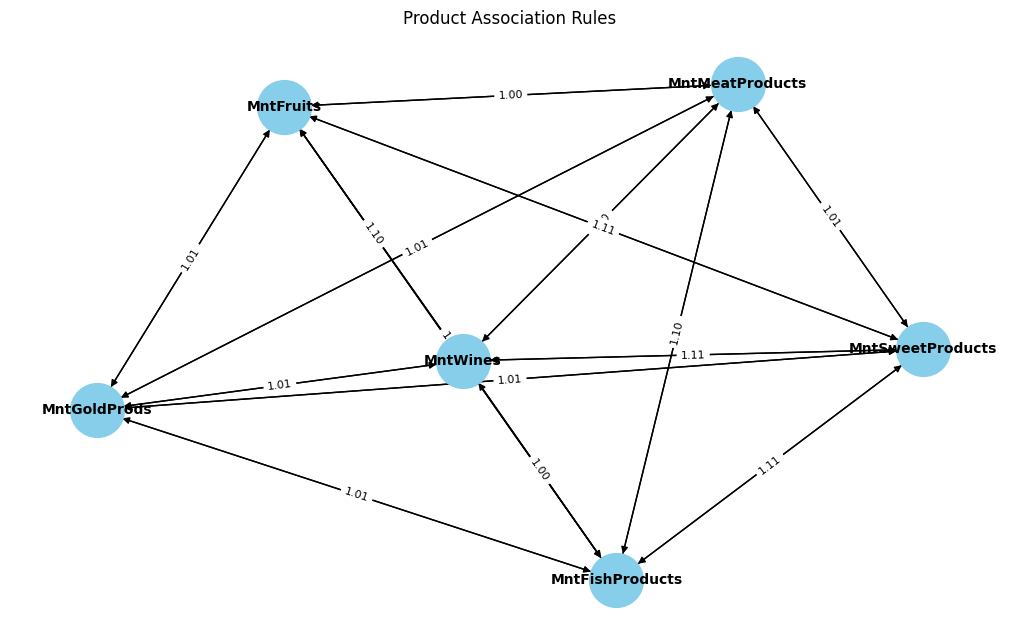

In [ ]:
# Import necessary libraries
import networkx as nx

# Created a directed graph to represent the association rules
graph = nx.DiGraph()

# Added nodes (products) to the graph
for product in filtered_rules['antecedents'].unique():
    graph.add_node(list(product)[0])  #only one antecedent per rule

# Adding edges (rules) to the graph
for index, row in filtered_rules.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    graph.add_edge(antecedent, consequent, weight=row['lift'])

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(graph, pos, edge_labels={(u, v): f"{w:.2f}" for u, v, w in graph.edges(data='weight')}, font_size=8)
plt.title("Product Association Rules")
plt.show()


### **SUMMARY**
    

* Above we **identified** the **products** that are **frequently purchased together** using **association rule mining** with the **apriori algorithm.**

* The **visualization** presents **these associations **as a **directed graph**, where **nodes represent products and edges represent rules**.

* This **key information** can be **used to make product recommendations**, such as suggesting wines to customers who have purchased meat products.

* By **understanding these patterns**, **businesses can tailor marketing strategies** and **increase sales by offering relevant product bundles or recommendations.**

## **5. Conclusion & Proposed Solutions:**

**Marketing Campaign Effectiveness Analysis**

Based on a thorough analysis of customer demographics, purchasing behavior, and campaign responses, this project reveals key insights for improving campaign performance:

* Based on our analysis, the following **key insights** were identified:

    - **Insight 1:** High-value and loyal customer segments demonstrate the strongest response rates to marketing campaigns. (Based on RFM analysis).
   
    - **Insight 2:** "Store and web channels"
     are the most effective channels for reaching and engaging high-value and loyal customers. (Based on channel performance analysis).

    - **Insight 3:** Marketing campaigns (Cmp3 and Cmp5) have been successful in driving customer response. (Based on feature importance analysis).


* Proposed **solutions** to improve marketing campaign effectiveness:

    -  **Solution 1:** Focus on customizing marketing campaigns to target high-value and loyal customer segments, maximizing their ROI. (Based on RFM analysis, feature importance).

    -  **Solution 2:** Prioritize marketing efforts on store and web channels for broader reach and higher conversion. (Based on channel performance analysis).

    -  **Solution 3:** Continue to leverage successful campaign strategies from Cmp3 and Cmp5, adapting and improving them based on insights. (Based on feature importance analysis).

    
*  These **data-driven solutions** aim to **enhance campaign targeting, channel optimization** and overall **effectiveness**, ultimately driving **improved business outcomes.**

------------------------------------------------------

### **Areas for Improvement:**

* This project was completed in 2 days, with working schedule of 7 hours a day.

* Mentioned below are the areas for improvements.


**1. Model Interpretability:**

* Can provide more interpretation of the selected model (Random Forest Classifier).

* By Considering techniques like SHAP values or partial dependence plots to understand how the model makes predictions and which features are most influential.

**2. Handling Outliers:**
* some potential outliers in the data but was not  explicitly addressed how they are handled.

* By using outlier detection and treatment methods to improve model robustness.

**3. Data Scaling:**
* We didn't mention data scaling, which is important for some machine learning models.

* scaling numerical features using techniques like standardization or normalization.

**4. A/B Testing:**

* We could include additional tests such as A/B testing to **validate** the **effectiveness of the proposed solutions in real-world scenarios**.
